In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Ejercicio 1

### l_n+1 = r*l_n*(1-l_n)
### l'_n+1 = r*(1-2*l_n)

In [ ]:
import numpy as np

def l_n (n, r, x_0):
  x = x_0
  valores = [x]
  for i in range(n):
    x = r*x*(1-x)
    valores.append(x)
  return x, valores

def dl_n (n, r, x_0):
  dval = 1
  dvalores = [dval]
  val = l_n(n - 1, r, x_0)[1]
  for i in range(n):
    dval *= r*(1-2*val[i])
    dvalores.append(dval)
  return dval, dvalores

def derivada_diferencias_finitas(n, r, x_0, h = 1e-5, dtype = np.float64):
  h = dtype(h)
  x_0 = dtype(x_0)
  r = dtype(r)
  l_n_x0_1 = dtype(l_n(n, r, x_0 - h)[0])
  l_n_x0_2 = dtype(l_n(n, r, x_0 + h)[0])
  return (l_n_x0_2 - l_n_x0_1) / (2*h)

9.36147982330218e-74 2.7755575615628914e-11


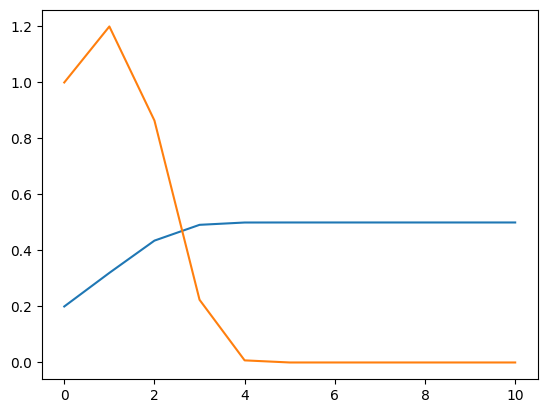

In [ ]:
n = 10
r = 2
x_0 = 0.2
h = 1e-6
dtype = np.float64

y = l_n(n, r, x_0)
dy = dl_n(n, r, x_0)
ddfy = derivada_diferencias_finitas(n, r, x_0, h, dtype)
print(dy[0], ddfy)

import matplotlib.pyplot as plt

plt.plot(y[1])
plt.plot(dy[1])
plt.show()

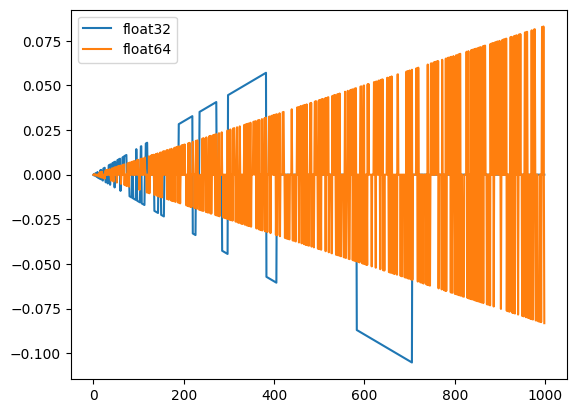

In [ ]:
n = 10
r = 2
x_0 = 0.2
h = 0.1
valores32 = []
valores64 = []
for i in range(1, 1000):
  valores32.append(derivada_diferencias_finitas(n, r, x_0, h/(1000*i), np.float32))
  valores64.append(3e8*derivada_diferencias_finitas(n, r, x_0, h/(1000*i), np.float64))
plt.plot(valores32, label = "float32")
plt.plot(valores64, label = "float64")
plt.legend()
plt.show()

In [ ]:
print(np.float32(np.pi), np.float64(np.pi))

3.1415927 3.141592653589793


In [ ]:
import torch

def l_n_torch (n, r, x_0, ):
  x = torch.tensor(x_0, dtype = torch.float64, requires_grad = True)
  for i in range(n):
    x = r*x*(1 - x)
    x.backward()
  return x, x.grad

[0.1, 0.18000000000000002, 0.2952, 0.41611392, 0.4859262511644672, 0.49960385918742867, 0.49999968614491325, 0.49999999999980305, 0.5, 0.5, 0.5] [1, 1.6, 2.048, 1.6777215999999995, 0.5629499534213118, 0.03169126500570573, 5.021681388309492e-05, 6.304320991657112e-11, 4.966633965594472e-23, 0.0, 0.0]
[0.1, 0.18000000000000002, 0.2952, 0.41611392, 0.4859262511644672, 0.49960385918742867, 0.49999968614491325, 0.49999999999980305, 0.5, 0.5, 0.5] [1, 1.6, 2.0479999999999996, 1.6777215999999995, 0.5629499534213116, 0.03169126500570573, 5.021681388309485e-05, 6.304320991099007e-11, 4.9666339655239424e-23, 0.0, 0.0]


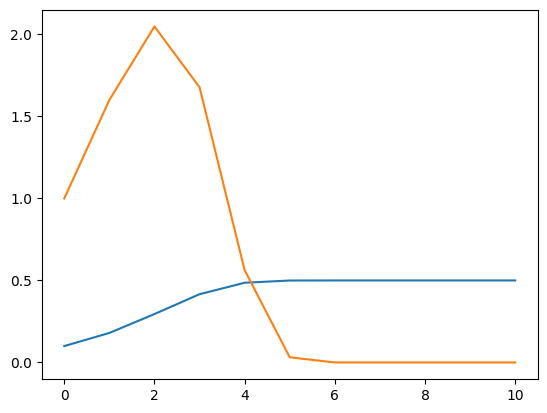

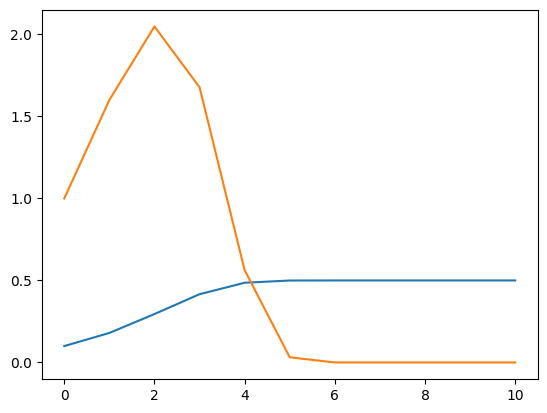

In [ ]:
import torch
import matplotlib.pyplot as plt

x_0 = 0.1
r = 2
n = 10

x = torch.tensor(x_0, dtype = torch.float64, requires_grad = True)
valores_y = [x.item()]
derivadas = [1]
y = x
for i in range(n):
  y = r*y*(1 - y)
  valores_y.append(y.item())
  y.backward(retain_graph = True)
  derivadas.append(x.grad.item())
  x.grad.zero_()
print(valores_y, derivadas)

y = l_n(n, r, x_0)
dy = dl_n(n, r, x_0)
print(y[1], dy[1])

plt.plot(y[1])
plt.plot(dy[1])
plt.show()

plt.plot(valores_y)
plt.plot(derivadas)
plt.show()

# Ejercicio 3

1)  f(x,y,z,w)=−zx2+2wy  evaluada en el punto  (x,y,z,w)=(2,4,1,3) ,

2)  g(x,y,z,w)=−3(4xy+max(w,z))  evaluada en el punto  (x,y,z,w)=(5,2,4,3) ,

In [ ]:
x, y, z, w = 2, 4, 1, 3
v = torch.tensor([x, y, z, w], dtype = torch.float64, requires_grad = True)
f = -v[2]*v[0]**2 + 2*v[3]*v[1]
f.backward()
print(f, v.grad)

x, y, z, w = 5, 2, 4, 3
v = torch.tensor([x, y, z, w], dtype = torch.float64, requires_grad = True)
f = 3*(4*v[0]*v[1] + torch.max(torch.tensor([v[2], v[3]])))
f.backward()
print(f, v.grad)

# Preguntar aca sobre la derivada de la funcion max()

tensor(20., dtype=torch.float64, grad_fn=<AddBackward0>) tensor([-4.,  6., -4.,  8.], dtype=torch.float64)
tensor(132., dtype=torch.float64, grad_fn=<MulBackward0>) tensor([24., 60.,  0.,  0.], dtype=torch.float64)


# Ejercicio 4

In [ ]:
# f(x) = 2x**2 + x + 4
# sin optimizador
paso = 1e-1
erd = 1e-10
x_0 = 0
x = torch.tensor(x_0, dtype = torch.float64, requires_grad = True)
for i in range(10000):
  f = 2*x**2 + x + 4
  f.backward()
  print(i + 1, x.item(), f.item(), x.grad.item())
  with torch.no_grad():
    x -= paso*x.grad.item()
    if abs(x.grad.item()) <= erd:
      break
    x.grad.zero_()

1 0.0 4.0 1.0
2 -0.1 3.92 0.6
3 -0.16 3.8912 0.36
4 -0.196 3.880832 0.21599999999999997
5 -0.21760000000000002 3.87709952 0.12959999999999994
6 -0.23056000000000001 3.8757558272 0.07775999999999994
7 -0.23833600000000002 3.875272097792 0.04665599999999992
8 -0.2430016 3.87509795520512 0.027993599999999952
9 -0.24580096 3.8750352638738432 0.01679615999999995
10 -0.247480576 3.8750126949945836 0.01007769599999997
11 -0.2484883456 3.8750045701980502 0.006046617600000026
12 -0.24909300736 3.875001645271298 0.003627970559999971
13 -0.24945580441600002 3.8750005922976674 0.0021767823359999383
14 -0.24967348264960001 3.8750002132271604 0.0013060694015999408
15 -0.24980408958976 3.875000076761778 0.0007836416409600089
16 -0.249882453753856 3.87500002763424 0.0004701849845759609
17 -0.2499294722523136 3.8750000099483266 0.00028211099074559876
18 -0.24995768335138815 3.8750000035813974 0.00016926659444738146
19 -0.2499746100108329 3.875000001289303 0.00010155995666838447
20 -0.24998476600649974 

In [ ]:
# f(x) = 2x**2 + x + 4
# con optimizador
paso = 1e-1
erd = 1e-10
x_0 = 0
x = torch.tensor(x_0, dtype = torch.float64, requires_grad = True)
optimizador = torch.optim.SGD([x], lr = paso)
for i in range(1000):
  f = 2*x**2 + x + 4
  f.backward()
  print(i + 1, x.item(), f.item(), x.grad.item())
  optimizador.step()
  if abs(x.grad.item()) <= erd:
    break
  optimizador.zero_grad()

1 0.0 4.0 1.0
2 -0.1 3.92 0.6
3 -0.16 3.8912 0.36
4 -0.196 3.880832 0.21599999999999997
5 -0.21760000000000002 3.87709952 0.12959999999999994
6 -0.23056000000000001 3.8757558272 0.07775999999999994
7 -0.23833600000000002 3.875272097792 0.04665599999999992
8 -0.2430016 3.87509795520512 0.027993599999999952
9 -0.24580096 3.8750352638738432 0.01679615999999995
10 -0.247480576 3.8750126949945836 0.01007769599999997
11 -0.2484883456 3.8750045701980502 0.006046617600000026
12 -0.24909300736 3.875001645271298 0.003627970559999971
13 -0.24945580441600002 3.8750005922976674 0.0021767823359999383
14 -0.24967348264960001 3.8750002132271604 0.0013060694015999408
15 -0.24980408958976 3.875000076761778 0.0007836416409600089
16 -0.249882453753856 3.87500002763424 0.0004701849845759609
17 -0.2499294722523136 3.8750000099483266 0.00028211099074559876
18 -0.24995768335138815 3.8750000035813974 0.00016926659444738146
19 -0.2499746100108329 3.875000001289303 0.00010155995666838447
20 -0.24998476600649974 

El resultado es el mismo, porque torch.optim.SGD (stochastic gradient descent) es un objeto que modifica los parámetros del modelo especificados en el primer elemento entre paréntesis, para reducir una funcion perdida mediante:

x <- x - ls*df/dx

nótese que el optimizador no tiene una función de pérdida explicita especificada. Aquello que minimiza, es cual sea la función que, directa o indirectamente dependa del parámetro a optimizar (x en este caso).

# Ejercicio 5

In [ ]:
from random import random
# Hago un perceptron simple
import torch
from torch import nn

# A.
# haciendolo "a mano"
class PerceptronSimple ():
                                # agrego la regularizacion L_2
  def __init__ (self, n_entradas, weight_decay = 0, semilla = None):
    if semilla != None:
      torch.manual_seed(semilla)
      self.semilla = semilla
    self.n_entradas = n_entradas
    self.weight_decay = weight_decay
    self.pesos = torch.rand(n_entradas + 1, requires_grad = True)

  ###############################################################################################

  def correr(self, x_entrada):
    if len(x_entrada.shape) == 1:
        x_entrada = x_entrada.unsqueeze(0)  # Convierto a matriz de 1 fila
    if x_entrada.shape[1] != self.n_entradas:
        raise ValueError(f"Dimensión incorrecta: se esperaban {self.n_entradas} entradas por dato.")
    sesgo = -torch.ones((x_entrada.shape[0], 1))  # Vector columna de -1 de dim igual a n° de datos
    x_entrada = torch.cat([sesgo, x_entrada], dim = 1) # Añado el sesgo a todos los x
    y = torch.matmul(x_entrada, self.pesos)  # matmul es multiplicacion de matrices
    z = 1/(1 + torch.exp(-y))
    return z

  def entrenar (self, entrada, salida_esperada, lr = 1e-3):
    salida = self.correr(entrada)
    mse = torch.mean((salida_esperada.T - salida).pow(2)) # estos son metodos de tensores pytorch
    l2 = self.weight_decay*((self.pesos).pow(2).sum()) # agrego la regularizacion L_2
    perdida = mse + l2
    perdida.backward()
    with torch.no_grad():
      self.pesos -= lr*self.pesos.grad
      self.pesos.grad.zero_()
    return perdida.item()

  # hacer esto asi me deja libertad para despues poder hacer actualizacion
  # de los pesos ya sea por dato individual o por lotes
  ###############################################################################################

  def evaluar (self, entrada, salida_esperada):
    salida = self.correr(entrada)
    with torch.no_grad():
      error = torch.mean((salida_esperada.T - salida).pow(2))
      desv_error = torch.std((salida_esperada.T - salida).pow(2))
    return salida, error, desv_error

##################################################################################################
##################################################################################################
##################################################################################################
# C.
# usando module

class PerceptronSimpleModule (nn.Module):

  def __init__ (self, n_entradas, weight_decay = 0, semilla = None):
    super(PerceptronSimpleModule, self).__init__()
    if semilla != None:
      torch.manual_seed(semilla)
      self.semilla = semilla
    self.n_entradas = n_entradas
    self.weight_decay = weight_decay
    self.fc = torch.nn.Linear(n_entradas, 1) # estas son dos capas continuas conectadas

  def correr (self, x_entrada):
    if len(x_entrada.shape) == 1:
        x_entrada = x_entrada.unsqueeze(0)
    if x_entrada.shape[1] != self.n_entradas:
        raise ValueError(f"Dimensión incorrecta: se esperaban {self.n_entradas} entradas por dato.")
    return torch.sigmoid(self.fc(x_entrada))

  def entrenar (self, entrada, salida_esperada, lr = 1e-3):
    optimizador = torch.optim.SGD(self.parameters(), lr = lr, weight_decay = self.weight_decay)
    salida = self.correr(entrada)
    perdida = nn.MSELoss(reduction = "mean")(salida_esperada, salida)
    perdida.backward()
    optimizador.step()
    optimizador.zero_grad()
    return perdida.item()

  def evaluar (self, entrada, salida_esperada):
    salida = self.correr(entrada)
    with torch.no_grad():
      error = (torch.mean((salida_esperada - salida).abs()))
      desv_error = torch.std((salida_esperada - salida).abs())
    return salida, error, desv_error

In [ ]:
# los pruebo

perceptron = PerceptronSimpleModule(n_entradas = 2, weight_decay = 0.00)

# Datos de prueba
entrada = torch.tensor([
    [-3, 2],  # -1
    [7, 0],   # 7
    [4, -2],  # 2
    [3, 2],   # 5
    [-1, -5], # -6
    [5, 1],   # 6
    [-1, 7],  # 6
    [2, 7],   # 10
    [-4, 10],   # 6
    [6, -3],  # 3
    [-2, 9],  # 7
    [4, 2],   # 6
    [8, -4],  # 4
    [1, 7],   # 8
    [-5, 1],  # -4
    [6, 3]    # 9
], dtype=torch.float32)

# Salidas esperadas (0 para menores o iguales a 5, 1 para mayores)
salida_esperada = torch.tensor([
    0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1
], dtype=torch.float32).unsqueeze(1)

# Entrenamiento
for epoch in range(1000):
  for i in range(12):
    loss = perceptron.entrenar(entrada[i], salida_esperada[i], lr = 3e-1)
  if epoch % 100 == 0:
    print(f"Época {epoch}, Pérdida: {loss}")

# Evaluación
salida, error, desv_error = perceptron.evaluar(entrada, salida_esperada)
print("Salida esperada:", salida_esperada.T)
print("Salida:", salida.T)
print("Error:", error)
print("Desviacion estandar del error:", desv_error)

Época 0, Pérdida: 0.05334591493010521
Época 100, Pérdida: 0.018723664805293083
Época 200, Pérdida: 0.014375592581927776
Época 300, Pérdida: 0.013471643440425396
Época 400, Pérdida: 0.01352209597826004
Época 500, Pérdida: 0.01393828820437193
Época 600, Pérdida: 0.01441337913274765
Época 700, Pérdida: 0.014721364714205265
Época 800, Pérdida: 0.014764991588890553
Época 900, Pérdida: 0.014563598670065403
Salida esperada: tensor([[0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.]])
Salida: tensor([[1.8351e-08, 9.9171e-01, 6.0756e-05, 3.3295e-01, 5.2831e-15, 8.8541e-01,
         9.3856e-01, 9.9999e-01, 9.5551e-01, 9.3966e-04, 9.9700e-01, 8.9644e-01,
         1.4350e-02, 9.9978e-01, 3.1409e-12, 9.9998e-01]],
       grad_fn=<PermuteBackward0>)
Error: tensor(0.0427)
Desviacion estandar del error: tensor(0.0862)


# Ejercicio 6

Implementemos un `PerceptronMulticapa` (un MLP o _multi-layer perceptron_) con función de activación ReLU.
Nuevamente, crear una clase, heredando de `torch.nn.Module`. El constructor de la misma debe recibir como argumentos la cantidad de características (dimensiones) de los datos de entrada, la cantidad de neuronas en la capa oculta (con una sola capa oculta), y la cantidad de salidas esperadas. También debe haber un argumento adicional que indique si la salida puede tomar cualquier valor real o debe estar entre 0 y 1 (función de activación sigmoide en la salida). La función de activación ReLU  deberá implementarse con `nn.ReLU`, instanciándola (¿cómo sería con `nn.functional.relu`?)

In [ ]:
import torch
torch.cuda.is_available()
from torch import nn

class PerceptronMulticapa (nn.Module):

  def __init__ (self, n_entrada, n_oculta, n_salida, f_act = 'relu', weight_decay = 0.0, semilla = None):
    super(PerceptronMulticapa, self).__init__()
    if semilla != None:
      torch.manual_seed(semilla)
      self.semilla = semilla
    self.n_entrada = n_entrada
    self.n_oculta = n_oculta
    self.n_salida = n_salida
    if f_act == 'relu':
      self.f_act = nn.ReLU()
    elif f_act == 'sigmoid':
      self.f_act = nn.Sigmoid()
    self.weight_decay = weight_decay
    self.fc1 = torch.nn.Linear(n_entrada, n_oculta, dtype = torch.float32)
    self.fc2 = torch.nn.Linear(n_oculta, n_salida, dtype = torch.float32)

  def correr (self, x_entrada):
    if len(x_entrada.shape) == 1:
      x_entrada = x_entrada.unsqueeze(0)
    if x_entrada.shape[1] != self.n_entrada:
      raise ValueError(f"Dimensión incorrecta: se esperaban {self.n_entrada} entradas por dato.")
    y1 = self.fc1(x_entrada)
    z1 = self.f_act(y1)
    y2 = self.fc2(z1)
    z2 = self.f_act(y2)
    return z2

  def entrenar (self, x_entrada, salida_esperada, lr = 1e-3):
    optimizador = torch.optim.SGD(self.parameters(), lr = lr, weight_decay = self.weight_decay)
    salida = self.correr(x_entrada)
    perdida = nn.MSELoss(reduction = "mean")(salida_esperada, salida)
    perdida.backward()
    optimizador.step()
    optimizador.zero_grad()
    return perdida.item()

  def evaluar (self, x_entrada, salida_esperada):
    salida = self.correr(x_entrada)
    with torch.no_grad():
      error = torch.mean((salida_esperada.T - salida).pow(2))
      desv_error = torch.std((salida_esperada.T - salida).pow(2))
    return salida, error, desv_error

# Ejercicio 7

Finalmente, vamos a realizar un bucle de entrenamiento del MLP sobre los datos de `Iris`, usando ahora todas las prestaciones de PyTorch. La tarea es clasificar la especie de planta en base a distintas dimensiones de la flor.
  - a) Primero que nada, debemos [descargar la base de datos de Iris](https://www.kaggle.com/datasets/uciml/iris) y agregarla a nuestro entorno. Es simplemente un archivo CSV.

- b) Crear una clase que implemente un dataset de PyTorch, heredando de `torch.utils.data.Dataset`. Recordar que esto implica definir los dos métodos especiales `__getitem__` y `__len__`. El constructor debe recibir como argumento la ruta al archivo `Iris.csv` que descargaron antes.

- c) Crear particiones de datos de entrenamiento, validación y testeo con sus respectivos `Dataset` y `Dataloader`. **Ayuda**: recordar la función `sklearn.model_selection.train_test_split`. También existe `torch.utils.data.random_split` para el mismo fin.

- d) Inicializar el modelo del **Ejercicio 6** y un optimizador tipo SGD con una tasa de aprendizaje de $10^{-4}$.

- e) Escribir y ejecutar el bucle de entrenamiento. Debe haber dos bucles, el externo sobre las épocas y el interno sobre los batches (es decir, iterando sobre el `DataLoader`). Usar el optimizador definido antes para gestionar la actualización de los pesos del MLP. Definir un número máximo de épocas y un criterio razonable para interrumpir el entrenamiento tempranamente si alguna métrica no mejora (¿sobre qué partición debemos monitorear la métrica?).


In [ ]:
# si quisiera cargar desde google drive haria esto
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import torch
from torch.utils.data import Dataset
import pandas as pd
from typing import Tuple
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

class MiDataset (Dataset):

  def __init__ (self, ruta_archivo):
    self.data = pd.read_csv(ruta_archivo)
    self.etiquetas = ['Iris-setosa','Iris-versicolor','Iris-virginica']
    self.vec_salida = torch.tensor([0, 0, 0], dtype = torch.float32)

    self.X = self.data.iloc[:, :-1].values # esto los vuelve arrays numpy
    self.Y = self.data.iloc[:, -1].values
    # tuve que normalizar para ver si asi andaban las cosas
    self.normalizador = MinMaxScaler()
    self.X = self.normalizador.fit_transform(self.X)

            # aca hay 2 'hints', no afectan al codigo, son de ayuda al usuario
  def __getitem__ (self, indice: int) -> Tuple:
    x = torch.tensor(self.X[indice], dtype = torch.float32)
    indice_etiqueta = self.etiquetas.index(self.Y[indice])
    self.vec_salida[indice_etiqueta] = 1
    y = self.vec_salida.clone()
    self.vec_salida[indice_etiqueta] = 0
    return x, y

  def __len__ (self):
    return self.data.shape[0]

  def particionar (self, ratio_e = 0.7, semilla = None, validacion = True):
    if ratio_e >= 1:
      raise ValueError(f'Ratio mal definido. Obervar valor.')
    indices = list(range(len(self)))
    i_entrenamiento, i_resto = train_test_split(
        indices, train_size = 1 - ratio_e, random_state = semilla)
    if validacion == True:
      i_validacion, i_prueba = train_test_split(
      i_resto, train_size = 0.5, random_state = semilla)
      datos_entrenamiento = Subset(self, i_entrenamiento)
      datos_validacion = Subset(self, i_validacion)
      datos_prueba = Subset(self, i_prueba)
      return datos_entrenamiento, datos_validacion, datos_prueba
    else:
      i_prueba = i_resto
      datos_entrenamiento = Subset(self, i_entrenamiento)
      datos_prueba = Subset(self, i_prueba)
      return datos_entrenamiento, datos_prueba

In [ ]:
ruta = '/content/iris_dataset/Iris.csv'
iris = MiDataset(ruta)
entrenamiento, prueba = iris.particionar(
    ratio_e = 0.7, validacion = False)

0.15707279741764069 0.19493168592453003 0.28919681906700134


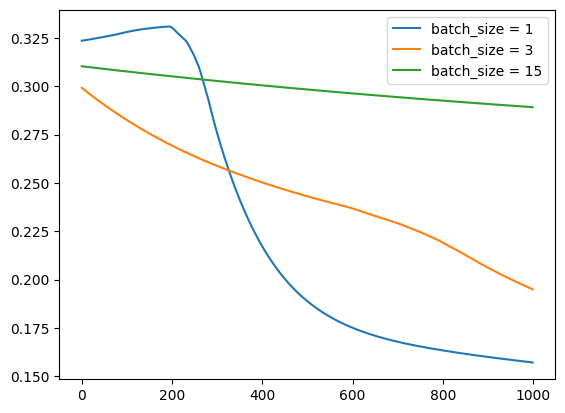

In [ ]:
import random
n_entrada = len(entrenamiento[0][0])
n_oculta = 15
n_salida = len(entrenamiento[0][1])
lr = 1e-4
er = 1e-4
# uso sigmoide xq relu a veces converge a valores != 0
funcion = 'relu'
wd = 0.0
semilla = random.randint(0, 999999999)

modelo1 = PerceptronMulticapa(
          n_entrada = n_entrada, n_oculta = n_oculta, n_salida = n_salida,
          f_act = funcion, weight_decay = wd, semilla = semilla)
modelo2 = PerceptronMulticapa(
          n_entrada = n_entrada, n_oculta = n_oculta, n_salida = n_salida,
          f_act = funcion, weight_decay = wd, semilla = semilla)
modelo3 = PerceptronMulticapa(
          n_entrada = n_entrada, n_oculta = n_oculta, n_salida = n_salida,
          f_act = funcion, weight_decay = wd, semilla = semilla)

# le cambie el shuffle a false xq parece no respetar el orden dato-etiqueta
cargador1 = DataLoader(entrenamiento, batch_size = 1, shuffle = False)
cargador2 = DataLoader(entrenamiento, batch_size = 3, shuffle = False)
cargador3 = DataLoader(entrenamiento, batch_size = 15, shuffle = False)

epocas = 1000
perdida1 = []
for i in range(epocas):
  for j in cargador1:
    x, y = j
    aux = modelo1.entrenar(x, y, lr = lr)
  with torch.no_grad():
    perdida1.append(aux)
    if aux < er:
      break
perdida2 = []
for i in range(epocas):
  for j in cargador2:
    x, y = j
    aux = modelo2.entrenar(x, y, lr = lr)
  with torch.no_grad():
    perdida2.append(aux)
    if aux < er:
      break
perdida3 = []
for i in range(epocas):
  for j in cargador3:
    x, y = j
    aux = modelo3.entrenar(x, y, lr = lr)
  with torch.no_grad():
    perdida3.append(aux)
    if aux < er:
      break

print(perdida1[-1], perdida2[-1], perdida3[-1])
import matplotlib.pyplot as plt
plt.plot(perdida1, label ='batch_size = 1')
plt.plot(perdida2, label ='batch_size = 3')
plt.plot(perdida3, label ='batch_size = 15')
plt.legend()
plt.show()

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Generar datos
n = 100
torch.manual_seed(42)
x = torch.randint(0, 11, (n, 2), dtype=torch.float32)

# Generar salidas esperadas
y = torch.zeros((n, 2), dtype=torch.float32)
y[:, 0] = (x[:, 0] + x[:, 1] > 5).float()  # 1 si suma > 5, 0 si no
y[:, 1] = (x[:, 0] - x[:, 1] < 0).float()  # 1 si resta < 0, 0 si no

# Dividir en entrenamiento y prueba
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(
    x, y, test_size=0.3, random_state=42
)

print("Datos de entrenamiento:", x_entrenamiento.shape)
print("Datos de prueba:", x_prueba.shape)

Datos de entrenamiento: torch.Size([70, 2])
Datos de prueba: torch.Size([30, 2])


[0.2690250306893309, 0.22313082044035837, 0.1951483639963766, 0.17766618769974787, 0.16611456913951286, 0.15801838901285897, 0.15202921255757318, 0.14737819865301716, 0.1436025447153653, 0.14040862804231022, 0.13760133573580835, 0.13504631383784974, 0.13264925051878185, 0.13034423640331566, 0.1280869536515334, 0.12585028537049447, 0.12362095191498931, 0.12139642910022821, 0.11918186732995037, 0.11698705715974315, 0.1148236689333508, 0.11270302720127935, 0.11063459371030131, 0.10862518767270336, 0.10667883690932557, 0.10479707325085025, 0.1029794700313335, 0.10122425167045224, 0.0995288590138668, 0.0978904076629069, 0.09630601826185742, 0.09477302461438684, 0.09328907959666317, 0.0918521838921205, 0.09046066216792474, 0.08911310809656488, 0.08780831528819615, 0.08654520670801451, 0.08532277101759334, 0.08414001074807331, 0.08299590439014189, 0.08188938238853458, 0.08081931561610742, 0.07978451409005823, 0.07878373336775216, 0.07781568609619673, 0.07687905646436076, 0.07597251571288131, 

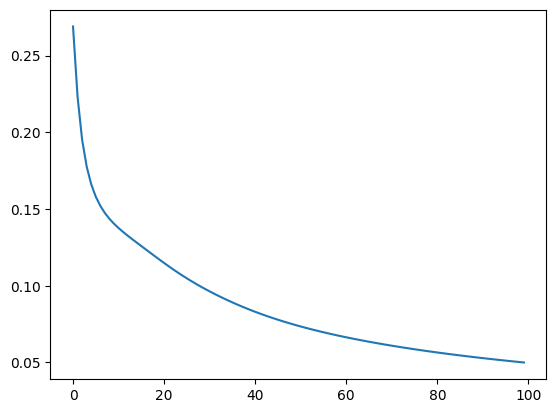

In [ ]:
n_entrada = len(x_entrenamiento[0])
n_oculta = 10
n_salida = len(y_entrenamiento[0])
lr = 1e-2

modelo = PerceptronMulticapa(
          n_entrada = n_entrada, n_oculta = n_oculta, n_salida = n_salida,
          f_act = 'sigmoid', weight_decay = 0.0)

perdida = []
epocas = 100
for i in range(epocas):
  for j in range(len(x_entrenamiento)):
    x, y = x_entrenamiento[j], y_entrenamiento[j]
    aux = modelo.entrenar(x, y, lr = lr)
  with torch.no_grad():
    perdida.append(aux)

print(perdida)
import matplotlib.pyplot as plt
plt.plot(range(epocas), perdida)
plt.show()